In [1]:
#Importing necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, KFold, cross_val_score, cross_val_predict
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score
from sklearn.metrics import accuracy_score
sns.set_palette('YlOrRd_r', n_colors = 3)
import pickle

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv("../data/parkinsons_data.txt")

In [3]:
#Dropping the target variable, name variable and those features that 
#we have found out to have low significance in all the models and are correlated.
X = df.drop(['status','name','MDVP:APQ','MDVP:Jitter(%)','MDVP:PPQ','MDVP:RAP'],axis = 1)
y = df['status']

In [4]:
#Performing train test split of the data stratifying on y, as the target variable is imbalanced.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, 
                                                    random_state = 42, stratify = y)

In [5]:
#Performing feature scaling
norm = StandardScaler().fit(X_train)
X_train_t = pd.DataFrame(columns = X_train.columns, data = norm.transform(X_train))
X_test_t = pd.DataFrame(columns = X_test.columns, data = norm.transform(X_test))

In [6]:
forest = RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
class_weight=None,
criterion='gini', max_depth=None,
max_features='auto',
max_leaf_nodes=None,
max_samples=None,
min_impurity_decrease=0.0,
min_impurity_split=None,
min_samples_leaf=1,
min_samples_split=2,
min_weight_fraction_leaf=0.0,
n_estimators=100, n_jobs=None,
oob_score=False, random_state=8,
verbose=0, warm_start=False)

In [7]:
forest.fit(X_train_t, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=8, verbose=0,
                       warm_start=False)

In [8]:
y_pred = forest.predict(X_test_t)
y_train_pred = forest.predict(X_train_t)

### Predicting and evaluating model performance on train data

In [9]:
#Printing the performance measures of random forest model
print("Accuracy score")
print(accuracy_score(y_train, y_train_pred))
print('\n')
print("Classification report")
print(classification_report(y_train, y_train_pred))
print('\n')
print("ROC AUC score")
print(roc_auc_score(y_train, y_train_pred))

Accuracy score
1.0


Classification report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        38
           1       1.00      1.00      1.00       118

    accuracy                           1.00       156
   macro avg       1.00      1.00      1.00       156
weighted avg       1.00      1.00      1.00       156



ROC AUC score
1.0


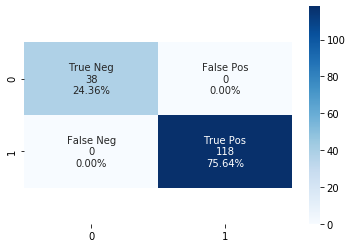

In [10]:
cf_matrix = confusion_matrix(y_train, y_train_pred)
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ["{0:0.0f}".format(value) for value in
                cf_matrix.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in
                     cf_matrix.flatten()/np.sum(cf_matrix)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
ax = sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='Blues')
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)
plt.show()

### Predicting and evaluating model performance on test data

In [11]:
#Printing the performance measures of random forest model
print("Accuracy score")
print(accuracy_score(y_test, y_pred))
print('\n')
print("Classification report")
print(classification_report(y_test, y_pred))
print('\n')
print("ROC AUC score")
print(roc_auc_score(y_test, y_pred))

Accuracy score
0.9230769230769231


Classification report
              precision    recall  f1-score   support

           0       0.89      0.80      0.84        10
           1       0.93      0.97      0.95        29

    accuracy                           0.92        39
   macro avg       0.91      0.88      0.90        39
weighted avg       0.92      0.92      0.92        39



ROC AUC score
0.8827586206896553


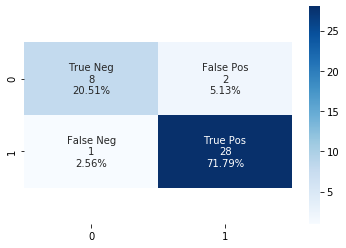

In [12]:
cf_matrix = confusion_matrix(y_test, y_pred)
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ["{0:0.0f}".format(value) for value in
                cf_matrix.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in
                     cf_matrix.flatten()/np.sum(cf_matrix)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
ax = sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='Blues')
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)
plt.show()

In [13]:
scores = cross_val_score(forest, X_train_t, y_train, cv=10)
print(scores)
print(scores.mean())

[0.875      0.8125     1.         0.9375     0.875      0.9375
 1.         0.93333333 0.93333333 0.93333333]
0.9237500000000001
